<a href="https://colab.research.google.com/github/adalves-ufabc/2024-Palestra-EY/blob/main/2024_Palestra_EY_API_OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Palestra: LangChain em ação: o maestro digital para soluções com IA Generativa**
### Prof. Alexandre Donizeti Alves
##### Universidade Federal do ABC [UFABC]

E-mail: alexandre.donizeti@ufabc.edu.br

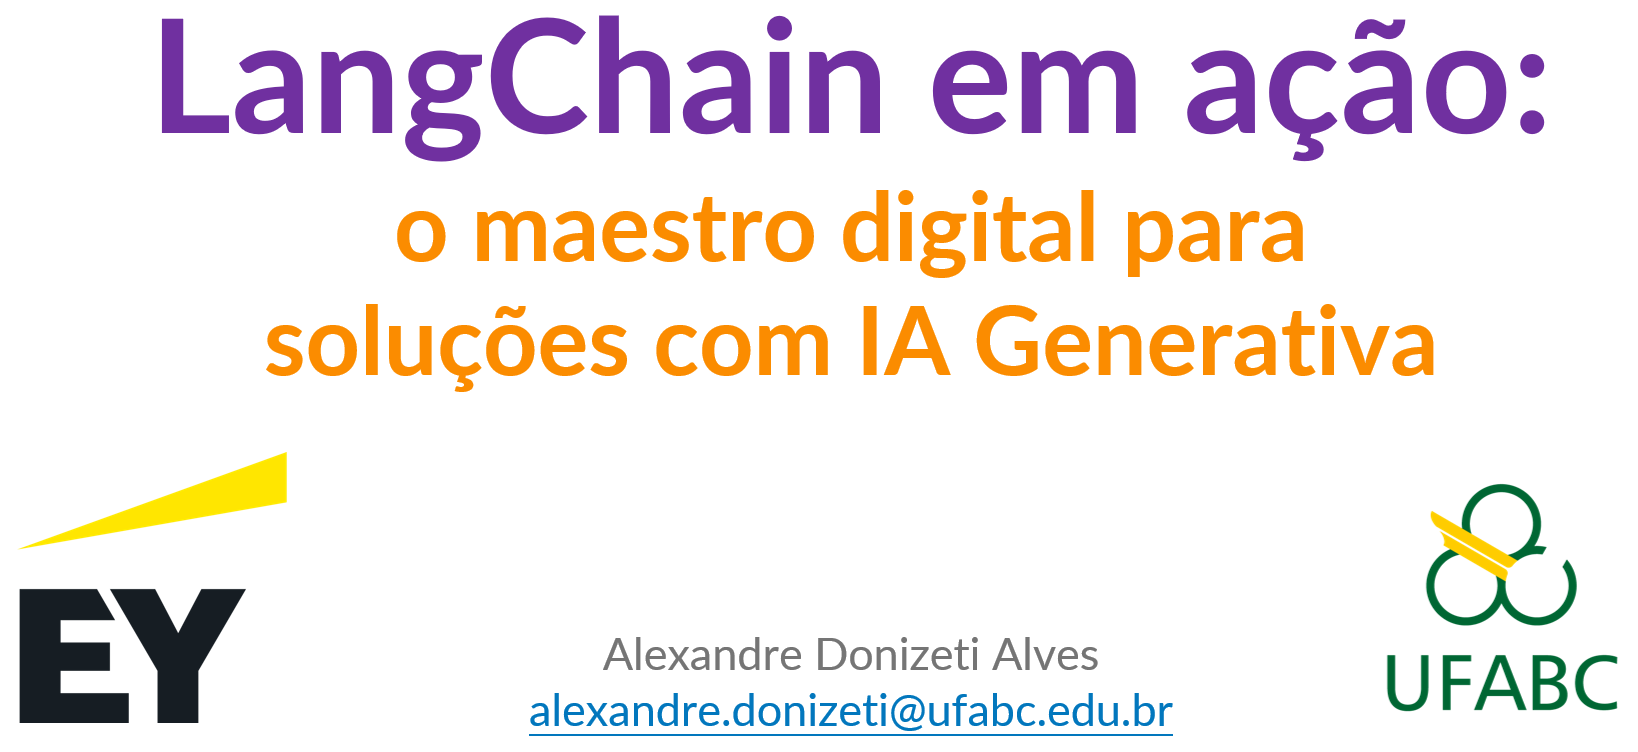

**API da OpenAI**

---

`Versão 1.9.0` [`Janeiro de 2024`]

In [ ]:
#@title Versão do Python no Google Colab

import sys

print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
#@title Versão da API da OpenAI
import openai

print(openai.__version__)

1.10.0


In [ ]:
from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [ ]:
#@title Teste

from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
    messages=[
        {
            "role": "user", "content": "Diga que isso é um teste",
        }
    ],
    model="gpt-3.5-turbo",
)

In [ ]:
type(resposta)

openai.types.chat.chat_completion.ChatCompletion

In [ ]:
resposta.json()

'{"id": "chatcmpl-8mhVUB4qxMXxMdUjsZAyzP8bTJ6ui", "choices": [{"finish_reason": "stop", "index": 0, "logprobs": null, "message": {"content": "Isso \\u00e9 um teste.", "role": "assistant", "function_call": null, "tool_calls": null}}], "created": 1706617676, "model": "gpt-3.5-turbo-0613", "object": "chat.completion", "system_fingerprint": null, "usage": {"completion_tokens": 6, "prompt_tokens": 14, "total_tokens": 20}}'

In [ ]:
#@title Correção Gramatical

mensagem_sistema = 'Você receberá instruções e sua tarefa é corrigir para o Português'
mensagem_usuario = "o mecado estava fexado"

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
   model = "gpt-3.5-turbo",
   messages = [{"role": "system", "content": mensagem_sistema},
               {"role": "user", "content": mensagem_usuario}]
)

In [ ]:
print(resposta.choices[0].message.content)

O mercado estava fechado.


In [ ]:
#@title Lista de Modelos

from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

# obter a lista de modelos
modelos = cliente.models.list()

In [ ]:
# imprimir total de modelos
print(len(modelos.data))

26


In [ ]:
# imprimir os nomes dos modelos
for modelo in modelos.data:
   print(modelo.id)

gpt-3.5-turbo-0301
text-embedding-3-large
dall-e-3
whisper-1
dall-e-2
text-embedding-ada-002
tts-1-hd-1106
tts-1-hd
davinci-002
babbage-002
text-embedding-3-small
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo
gpt-4
gpt-4-0613
gpt-4-vision-preview
gpt-3.5-turbo-0613
gpt-3.5-turbo-16k-0613
gpt-4-1106-preview
gpt-3.5-turbo-1106
tts-1-1106
gpt-3.5-turbo-instruct
tts-1
gpt-3.5-turbo-instruct-0914
gpt-3.5-turbo-16k


In [ ]:
#@title Análise de Sentimentos

# Código em Python para fazer uma requisição HTTP utilizando o endpoint “chat completions”

import requests

endpoint = "https://api.openai.com/v1/chat/completions"

mensagem_sistema = 'Você é um assistente que analisa sentimentos de avaliações de produtos'
mensagem_usuario = "Aqui está uma avaliação de um produto: 'Este produto é incrível!"
mensagem_assistente = "Classifique o sentimento retornando apenas 'Positivo' ou 'Negativo'. "

parametros = {
   "model": "gpt-3.5-turbo-0613",
   "messages": [
      {"role": "system", "content": mensagem_sistema},
      {"role": "user", "content": mensagem_usuario},
      {"role": "assistant", "content": mensagem_assistente}]
}
headers = {
   "Content-Type": "application/json",
   "Authorization": f"Bearer { OPENAI_API_KEY }"
}

resposta = requests.post(endpoint, json=parametros, headers=headers)
resposta.json()

{'id': 'chatcmpl-8ku4ZNEzF5cRmhFSreIBsSWM3gY9X',
 'object': 'chat.completion',
 'created': 1706189323,
 'model': 'gpt-3.5-turbo-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant', 'content': 'Positivo'},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 67, 'completion_tokens': 3, 'total_tokens': 70},
 'system_fingerprint': None}

In [ ]:
# Código em Python utilizando a biblioteca da API com o endpoint “chat completions”

mensagem_sistema = 'Você é um assistente que analisa sentimentos de avaliações de produtos'
mensagem_usuario = "Aqui está uma avaliação de um produto: 'Este produto é incrível!"
mensagem_assistente = "Classifique o sentimento retornando apenas 'Positivo' ou 'Negativo'. "

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
   model = "gpt-3.5-turbo-0613",
   messages = [{"role": "system", "content": mensagem_sistema},
               {"role": "user", "content": mensagem_usuario},
               {"role": "assistant", "content": mensagem_assistente}]
)

In [ ]:
print(resposta.choices[0].message.content)

Positivo


In [ ]:
#@title Tradução

from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-3.5-turbo-0613",
  messages = [
    {
      "role": "system",
      "content": "Você receberá uma frase em português e sua tarefa é traduzi-la para o inglês."
    },
    {
      "role": "user",
      "content": "Meu nome é Alexandre. Qual é o seu?"
    }
  ]
)

In [ ]:
print(resposta.choices[0].message.content)

My name is Alexandre. What is yours?


**Referências**:


https://platform.openai.com/docs/api-reference

https://platform.openai.com/examples
